In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
 
df = pd.read_csv("/content/drive/MyDrive/dataset/breast cancer")
 
del df['id']
del df['Unnamed: 32']
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [3]:
scaler = StandardScaler()
scaler.fit(df.drop('diagnosis', axis=1))
scaled_features = scaler.transform(df.drop('diagnosis', axis=1))
 
X = scaled_features
y = df['diagnosis']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

model = KNeighborsClassifier(n_neighbors=5)
 
model.fit(X_train, y_train)
 
model_predict = model.predict(X_test)
 
print(confusion_matrix(y_test, model_predict))
print()
print(classification_report(y_test, model_predict))


[[111   1]
 [  2  57]]

              precision    recall  f1-score   support

           B       0.98      0.99      0.99       112
           M       0.98      0.97      0.97        59

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [4]:
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
#perform 10 fold cross validation

for k in range(1, 51, 2):
  neighbors.append(k)
  knn= KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(
      knn, X_train, y_train, cv=10, scoring = 'accuracy')
  cv_scores.append(scores.mean())
  
MSE = [1-x for x in cv_scores]

#determine the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d' % optimal_k)

The optimal number of neighbors is 3


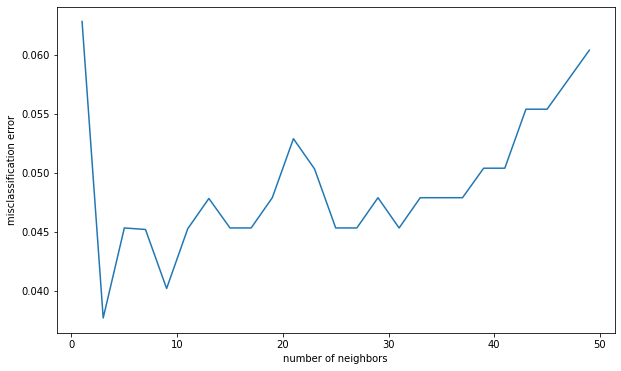

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('number of neighbors')
plt.ylabel('misclassification error')
plt.show()

In [9]:
cols = df.columns.tolist()
print("new_patient = [")
for item in cols:
    print("\0, "+"#"+item)
print("]")


new_patient = [
 , #diagnosis
 , #radius_mean
 , #texture_mean
 , #perimeter_mean
 , #area_mean
 , #smoothness_mean
 , #compactness_mean
 , #concavity_mean
 , #concave points_mean
 , #symmetry_mean
 , #fractal_dimension_mean
 , #radius_se
 , #texture_se
 , #perimeter_se
 , #area_se
 , #smoothness_se
 , #compactness_se
 , #concavity_se
 , #concave points_se
 , #symmetry_se
 , #fractal_dimension_se
 , #radius_worst
 , #texture_worst
 , #perimeter_worst
 , #area_worst
 , #smoothness_worst
 , #compactness_worst
 , #concavity_worst
 , #concave points_worst
 , #symmetry_worst
 , #fractal_dimension_worst
]


In [10]:
new_patient = [
    11.76,
    18.14,
    75,
    431.1,
    0.09968,
    0.05914,
    0.02685,
    0.03515,
    0.1619,
    0.06287,
    0.645,
    2.105,
    4.138,
    49.11,
    0.005596,
    0.01005,
    0.01272,
    0.01432,
    0.01575,
    0.002758,
    13.36,
    23.39,
    85.1,
    553.6,
    0.1137,
    0.07974,
    0.0612,
    0.0716,
    0.1978,
    0.06915
]
new_pred = model.predict([new_patient])
new_pred


array(['M'], dtype=object)